In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

#Data = pd.read_csv("../Data/smalldata.csv")
Data = pd.read_csv("../Data/300k.csv")
#print(Data.head())

#Steage 1
Selection = ['pokemonId', 'latitude', 'longitude','appearedTimeOfDay', 'appearedHour','appearedMinute',\
             'appearedDay','terrainType', 'closeToWater', 'gymDistanceKm','city', 'continent','weather', 'temperature', \
             'windSpeed', 'windBearing', 'pressure','population_density','urban','suburban','midurban','pokestopDistanceKm','rural']
#Selection = ['pokemonId', 'city','latitude', 'longitude', 'appearedHour','appearedMinute',\
#            'terrainType', 'closeToWater', 'gymDistanceKm','weather', 'temperature', \
#             'windSpeed', 'windBearing', 'pressure',\
#            'class' ]
ReducedData = Data.loc[:, Selection]
ReducedData.head()

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,pokemonId,latitude,longitude,appearedTimeOfDay,appearedHour,appearedMinute,appearedDay,terrainType,closeToWater,gymDistanceKm,city,continent,weather,temperature,windSpeed,windBearing,pressure,population_density,urban,suburban,midurban,pokestopDistanceKm,rural
0,16,20.525745,-97.460829,night,5,57,8,14,False,0.049869,Mexico_City,America,Foggy,25.5,4.79,269,1018.02,2431.2341,True,True,True,0.081776,False
1,133,20.523695,-97.461167,night,5,57,8,14,False,0.259156,Mexico_City,America,Foggy,25.5,4.79,269,1018.02,2431.2341,True,True,True,0.195622,False
2,16,38.903590,-77.199780,night,5,57,8,13,False,0.489886,New_York,America,Clear,24.2,4.29,218,1015.29,761.8856,False,True,True,0.338602,False
3,13,47.665903,-122.312561,night,5,56,8,0,True,0.359309,Los_Angeles,America,PartlyCloudy,15.6,5.84,160,1020.52,4842.1626,True,True,True,0.109479,False
4,133,47.666454,-122.311628,night,5,56,8,0,True,0.210543,Los_Angeles,America,PartlyCloudy,15.6,5.84,160,1020.52,4842.1626,True,True,True,0.040364,False


In [3]:
def Convertnumber(Data, field):
    Data[field]= Data[field].astype('category')
    catdict = dict(enumerate(Data[field].cat.categories))
    Data[field] = Data[field].cat.codes
    return catdict, Data

In [4]:
weatherdict, ReducedData = Convertnumber(ReducedData, 'weather')
waterdict, ReducedData = Convertnumber(ReducedData, 'closeToWater')
appearedTimeOfDaydict, ReducedData = Convertnumber(ReducedData, 'appearedTimeOfDay')
citydict, ReducedData = Convertnumber(ReducedData, 'city')
continentdict, ReducedData = Convertnumber(ReducedData, 'continent')
urbandict, ReducedData = Convertnumber(ReducedData, 'urban')
suburbandict, ReducedData = Convertnumber(ReducedData, 'suburban')
midurbandict, ReducedData = Convertnumber(ReducedData, 'midurban')
ruraldict, ReducedData = Convertnumber(ReducedData, 'rural')
ReducedData.head()

,pokemonId,latitude,longitude,appearedTimeOfDay,appearedHour,appearedMinute,appearedDay,terrainType,closeToWater,gymDistanceKm,city,continent,weather,temperature,windSpeed,windBearing,pressure,population_density,urban,suburban,midurban,pokestopDistanceKm,rural
0,16,20.525745,-97.460829,3,5,57,8,14,0,0.049869,59,1,11,25.5,4.79,269,1018.02,2431.2341,1,1,1,0.081776,0
1,133,20.523695,-97.461167,3,5,57,8,14,0,0.259156,59,1,11,25.5,4.79,269,1018.02,2431.2341,1,1,1,0.195622,0
2,16,38.903590,-77.199780,3,5,57,8,13,0,0.489886,65,1,4,24.2,4.29,218,1015.29,761.8856,0,1,1,0.338602,0
3,13,47.665903,-122.312561,3,5,56,8,0,1,0.359309,52,1,20,15.6,5.84,160,1020.52,4842.1626,1,1,1,0.109479,0
4,133,47.666454,-122.311628,3,5,56,8,0,1,0.210543,52,1,20,15.6,5.84,160,1020.52,4842.1626,1,1,1,0.040364,0


In [8]:
ReducedData['pokestopDistanceKm'] = ReducedData['pokestopDistanceKm'].convert_objects(convert_numeric=True).dropna()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


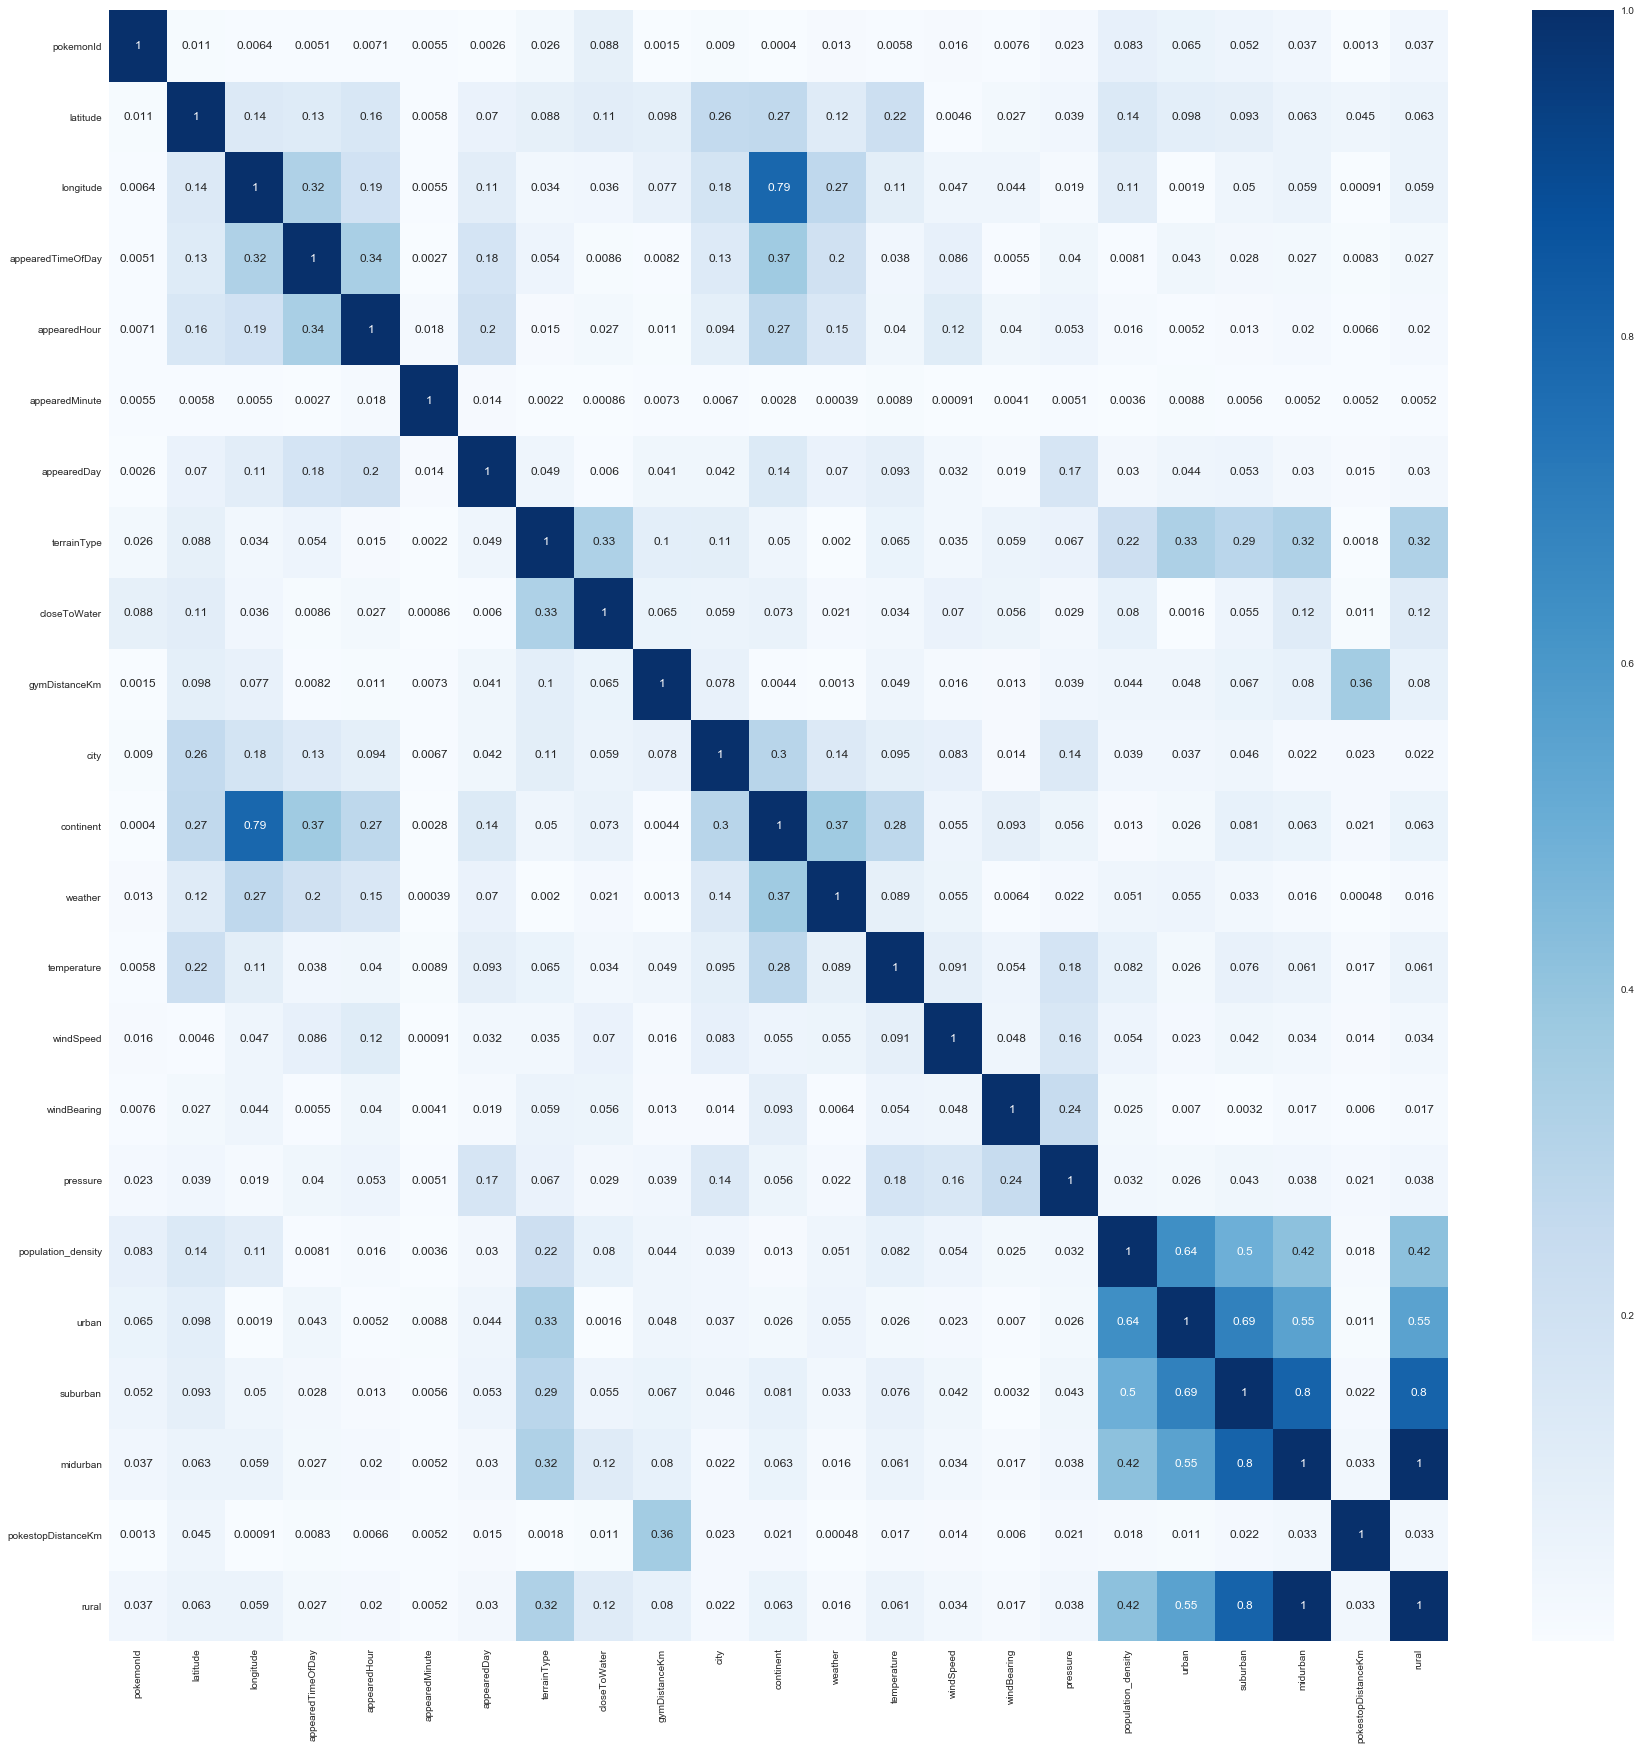

In [9]:
plt.subplots(figsize = (30,30))
corr = abs(ReducedData.corr())
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,cmap = "Blues")
plt.savefig('corr_figure.jpg')

plt.show()

In [ ]:
Predict_city = np.array(list(map(lambda x: catedict3[x],result)))
Predict_city

In [ ]:
Predict_latitude = pd.DataFrame(Predict_city)
Predict_latitude.to_csv("../Result/Predict_city.csv")

In [ ]:
city = ReducedData['city']
city.to_csv("../Result/city.csv",header = True)